In [1]:
import pandas as pn
import numpy as np
import seaborn as sns

import sklearn as sk
import sklearn.model_selection
from sklearn.svm import SVC
import matplotlib.pyplot as plt

iris = sns.load_dataset("iris")


#print(iris)

X = iris[["sepal_length", "sepal_width"]] #Only using these 2 because otherwise I can't visualise it. Accuracy with all 4 variables is over 95%

y = iris["species"]

(X, y)

(     sepal_length  sepal_width
 0             5.1          3.5
 1             4.9          3.0
 2             4.7          3.2
 3             4.6          3.1
 4             5.0          3.6
 ..            ...          ...
 145           6.7          3.0
 146           6.3          2.5
 147           6.5          3.0
 148           6.2          3.4
 149           5.9          3.0
 
 [150 rows x 2 columns],
 0         setosa
 1         setosa
 2         setosa
 3         setosa
 4         setosa
          ...    
 145    virginica
 146    virginica
 147    virginica
 148    virginica
 149    virginica
 Name: species, Length: 150, dtype: object)

In [2]:
print(np.unique(y))

['setosa' 'versicolor' 'virginica']


In [3]:
y = y.apply(lambda x: {'setosa' : 0, 'versicolor': 1, 'virginica': 2}[x]) #COnvert 7 to numbers so c will work later

y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [4]:
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)
X_train

,sepal_length,sepal_width
30,4.8,3.1
37,4.9,3.6
73,6.1,2.8
53,5.5,2.3
7,5.0,3.4
...,...,...
26,5.0,3.4
57,4.9,2.4
13,4.3,3.0
32,5.2,4.1


In [5]:
model = SVC(kernel = "linear")
model.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
model.score(X_test, y_test)

0.6578947368421053

In [7]:
print("accuracy")

sk.metrics.accuracy_score(y_test, model.predict(X_test))

accuracy


0.6578947368421053

C:\Users\Nivek\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


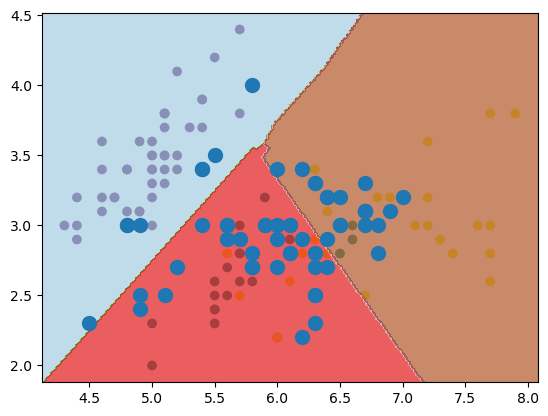

In [16]:
#Just using your code because my laptop is dieing and I have a meeting with my team scheduled for after class.
plt.scatter(X["sepal_length"], X["sepal_width"], c = y) #Only visualising 2 because it is hard to do more than that.

ax =plt.gca()

x_lim = ax.get_xlim()
y_lim = ax.get_ylim()

xx = np.linspace(x_lim[0], x_lim[1], 200)
yy = np.linspace(y_lim[0], y_lim[1], 200)

YY, XX = np.meshgrid(yy,xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

z = model.decision_function(xy)

z = np.argmax(z, axis = 1).reshape(XX.shape)

contour = ax.contourf(XX, YY, z, alpha = .7, cmap = plt.cm.Paired)

ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s = 100)